For IDLE configuration:
1.  Open Anaconda
2.  Launch the CMD
3.  execute `idle`
4.  In the python shell, execute:

    `import sys`
    
    `sys.path.append('F:\\fci\\Pattern Recognation\\Week 03 - Introduction')`

# Chapter 1 - Introdcution

In [1]:
from prml.linear import (
    LinearRegression, RidgeRegression, BayesianRegression
)
from prml.preprocess import PolynomialFeature
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)


## 1.1. Example: Polynomial Curve Fitting

In [2]:
# create an artificial dataset with added gaussian noise
def create_dataset(func, sample_size, std):
    # create features of values between 0 and 1 with size sample_size
    x = np.linspace(0, 1, sample_size)
    # create the target vector computed from the function func with added noise
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t


In [3]:
# create the function sin(2*pi*x) that resembles the target values
def my_sin(x):
    return np.sin(2 * np.pi * x)


In [4]:
# generate the training dataset (x_train, y_train), we will create 10 samples with standard deviation 0.25
x_train, y_train = create_dataset(my_sin, 10, 0.25)

# generate test dataset with 100 samples that resembles the true underlying function
x_test = np.linspace(0, 1, 100)
y_test = my_sin(x_test)


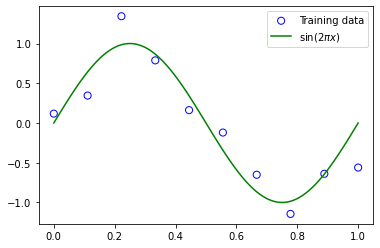

In [5]:
# plot the training dataset as scatters and plot the test dataset as line plot.
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')
plt.plot(x_test, y_test, c='g', label='$\sin(2 \pi x)$')
plt.legend()
plt.show()


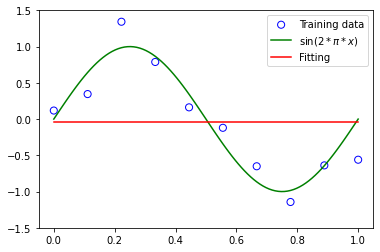

In [6]:
# implement a linear regression model of degree 0
degree = 0
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


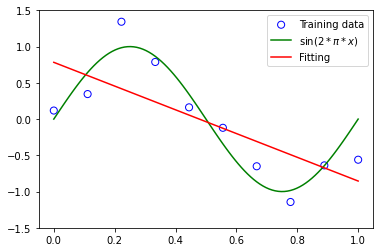

In [7]:
# implement a linear regression model of degree 1
degree = 1
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


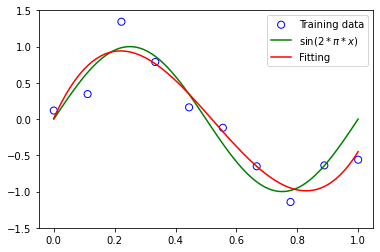

In [8]:
# implement a linear regression model of degree 3
degree = 3
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


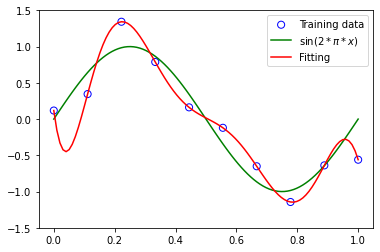

In [9]:
# implement a linear regression model of degree 9
degree = 9
# a transformer object to transform the feature vector
feature = PolynomialFeature(degree)
# transform the training features to degree 0
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)  # transform the test features to degree 0

# define and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# test the predictions of the model
y = model.predict(X_test)

# plot the training dataset
plt.scatter(x_train, y_train, facecolor='none',
            edgecolors='b', s=50, label='Training data')

# plot the test dataset
plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')

# plot the model fitting line (predictions)
plt.plot(x_test, y, c='r', label='Fitting')

plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


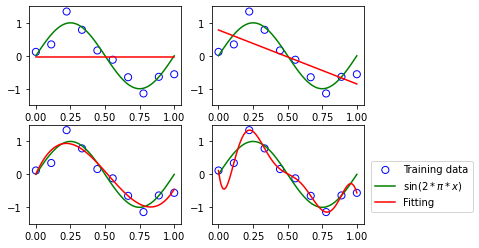

In [10]:
# compare different degrees of the model in one figure
for i, degree in enumerate([0, 1, 3, 9]):
    # create a plot of 2 rows and 2 columns. The third argument is the index of the plot
    plt.subplot(2, 2, i+1)
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor='none',
                edgecolors='b', s=50, label='Training data')
    plt.plot(x_test, y_test, c='g', label='$\sin(2 * \pi * x)$')
    plt.plot(x_test, y, c='r', label='Fitting')

    plt.ylim(-1.5, 1.5)

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()


### Computing Error

We will compute the error using Root Mean Squared Error (RMSE) function.

$ \LARGE \sqrt{\sum_{t=1}^T\frac{({ \hat{y_t} - y_t})^2}{T}}$ 

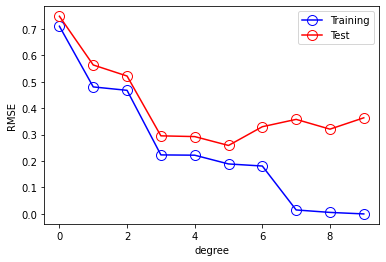

In [11]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_err = rmse(train_preds, y_train)
    test_err = rmse(test_preds, y_test + np.random.normal(scale=0.25, size=len(y_test)))
    
    training_errors.append(train_err)
    test_errors.append(test_err)

plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

### Regulariztion

Regularization is a penalty term added to the error function to prevent coefficient from reaching large values.

To define a linear regression model with regulariztion, we will use RidgeRegression model. 

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm.

$E(\bf{w}) = 1/2 \sum_{n=1}^N \{{y(x_n, \bf{w}) - t_n}\}^2 + \lambda/2 ||\bf{w}||^2$

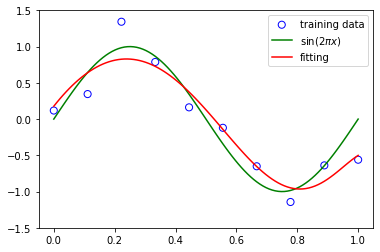

In [12]:
feature = PolynomialFeature(9)  # a model of degree 9 overfits the data
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

# alpha is similar to lambda to control the regularization strength
model = RidgeRegression(alpha=1e-3)
model.fit(X_train, y_train)

y = model.predict(X_test)

plt.scatter(x_train, y_train, facecolor="none",
            edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="fitting")
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()


## 1.2.6 Bayesian curve fitting

We will apply a regression model that implements the Baysian formula 

$𝑝(\bf{𝒘│𝒙,𝒕},\alpha,\beta) = 𝑝(\bf{𝒕│𝒙,𝒘},\beta)𝑝(\bf{𝒘}│\alpha)$

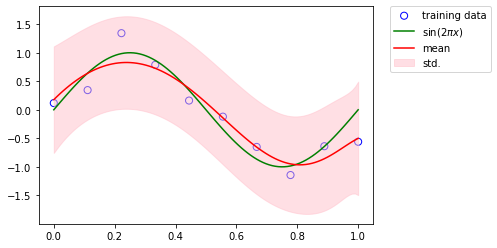

In [13]:
model = BayesianRegression(alpha=2e-3, beta=2)
model.fit(X_train, y_train)

# this model can returns the mean and the standard deviation of the predictions
y, y_err = model.predict(X_test, return_std=True)

plt.scatter(x_train, y_train, facecolor="none",
            edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
plt.plot(x_test, y, c="r", label="mean")

# visualize the standard deviation of the predictive distribution
plt.fill_between(x_test, y - y_err, y + y_err,
                 color="pink", label="std.", alpha=0.5)


plt.legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.)
plt.show()
